<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

# Lab 5.1.1
# *Evaluating Classification Models*

In this lab you will be practicing evaluating classification models (Logistic Regression in particular) on a "Breast Cancer" data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

%matplotlib inline

### 1. Load Data

From UCI's Machine Learning Repository: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/


Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

    a) radius (mean of distances from center to points on the perimeter)
    b) texture (standard deviation of gray-scale values)
    c) perimeter
    d) area
    e) smoothness (local variation in radius lengths)
    f) compactness (perimeter^2 / area - 1.0)
    g) concavity (severity of concave portions of the contour)
    h) concave points (number of concave portions of the contour)
    i) symmetry
    j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
breast_cancer_csv = 'breast-cancer-wisconsin-data.csv'

### 2. EDA

Explore dataset. Check for nulls. Make the target column binary.

In [4]:
df = pd.read_csv(breast_cancer_csv)

In [5]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [6]:
df = df.drop(columns=['Unnamed: 32'])

In [7]:
df = df.replace({'M':1,"B":0})

In [8]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    int64  
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [10]:
df['diagnosis'].value_counts()

diagnosis
0    357
1    212
Name: count, dtype: int64

In [11]:
df_x=df.drop(columns='diagnosis')

In [12]:
X=df_x

In [13]:
y=df['diagnosis']

In [14]:
X.shape

(569, 31)

In [15]:
y.shape

(569,)

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [17]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()


### 3. Logistic Regression Model

#### 3.1 Use Logistic Regression

Use Logistic Regression and examine accuracy score, confusion matrix, classification report for that model.

#### 3.2 Calculate the predicted labels and predicted probabilities on the test set.

In [18]:
# predict test class:

# predicted test probability:

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [20]:
model.fit(X_train, y_train)
r2 = model.score(X_train, y_train)
print(r2)

0.9120879120879121


In [21]:
from sklearn import metrics



In [22]:
from sklearn.metrics import confusion_matrix


# Prediction
y_predicted = model.predict(X_test)

# Checking the accuracy
con_matrix = confusion_matrix(y_test, y_predicted)


In [23]:
print(con_matrix)

[[70  1]
 [ 4 39]]


In [24]:
from sklearn.metrics import classification_report, confusion_matrix


print(classification_report(y_test, y_predicted))
print(confusion_matrix(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        71
           1       0.97      0.91      0.94        43

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114

[[70  1]
 [ 4 39]]


#### 3.3 Create the confusion matrix for your classifier's performance on the test set.

Convert confusion_matrix to a dataframe.

    columns=['predicted_healthy', 'predicted_cancer']
    index=['is_healthy', 'is_cancer']

In [25]:
labels = np.unique(y_test)

con_matrix = confusion_matrix(y_test, y_predicted,labels=labels)

pd.DataFrame(con_matrix, index=['is_healthy', 'is_cancer'], columns=['predicted_healthy', 'predicted_cancer'])

,predicted_healthy,predicted_cancer
is_healthy,70,1
is_cancer,4,39


#### 3.4 Calculate Accuracy

**Classification Accuracy:** Overall, how often is the classifier correct?

    (TP + TN) / float(TP + TN + FP + FN)

In [26]:
# ANSWER
TP = 70
TN = 39
FP = 4
FN = 1
accuracy= (TP + TN) / float(TP + TN + FP + FN)
print(accuracy)

0.956140350877193


#### 3.5 Calculate Classification Error

**Classification Error:** Overall, how often is the classifier incorrect?

Also known as "Misclassification Rate"

    (FP + FN) / float(TP + TN + FP + FN)

In [27]:
class_error = (FP + FN) / float(TP + TN + FP + FN)
print(class_error)

0.043859649122807015


#### 3.6 Calculate Sensitivity

**Sensitivity:** When the actual value is positive, how often is the prediction correct?

Something we want to maximize
How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"
- TP / all positive
    - all positive = TP + FN

    sensitivity = TP / float(FN + TP)

In [28]:
sensitivity = TP / float(FN + TP)
print(sensitivity)

0.9859154929577465


#### 3.7 Calculate Specificity

**Specificity:** When the actual value is negative, how often is the prediction correct?

- Something we want to maximize. How "specific" (or "selective") is the classifier in predicting positive instances?
- TN / all negative
    - all negative = TN + FP

    specificity = TN / (TN + FP)

In [29]:
specificity = TN / (TN + FP)
print(specificity)

0.9069767441860465


#### 3.8 Calculate False Positive Rate

**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

    false_positive_rate = FP / float(TN + FP)

In [30]:
false_positive_rate = FP / float(TN + FP)
print(false_positive_rate)

0.09302325581395349


#### 3.9 Calculate Precision

**Precision:** When a positive value is predicted, how often is the prediction correct?

How "precise" is the classifier when predicting positive instances?

    precision = TP / float(TP + FP)

In [31]:
precision = TP / float(TP + FP)
print(precision)

0.9459459459459459


#### 3.10 Create a predicted test probability dataframe with column names 'class_0_pp','class_1_pp'

In [32]:
print(y_predicted)

[0 1 1 0 0 1 1 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 1
 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0
 0 0 0 1 0 0 1 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 1 0 0 0 1 0 0 1
 0 0 1]


In [33]:
# ANSWER
predicted_test_prob = pd.DataFrame(columns=['class_0_pp','class_1_pp'])
predicted_test_prob.head()

,class_0_pp,class_1_pp


#### 3.11 The Receiver operating characteristic (ROC) curve

Plot the ROC curve for Class 1

In [34]:
from sklearn.metrics import roc_curve, auc

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


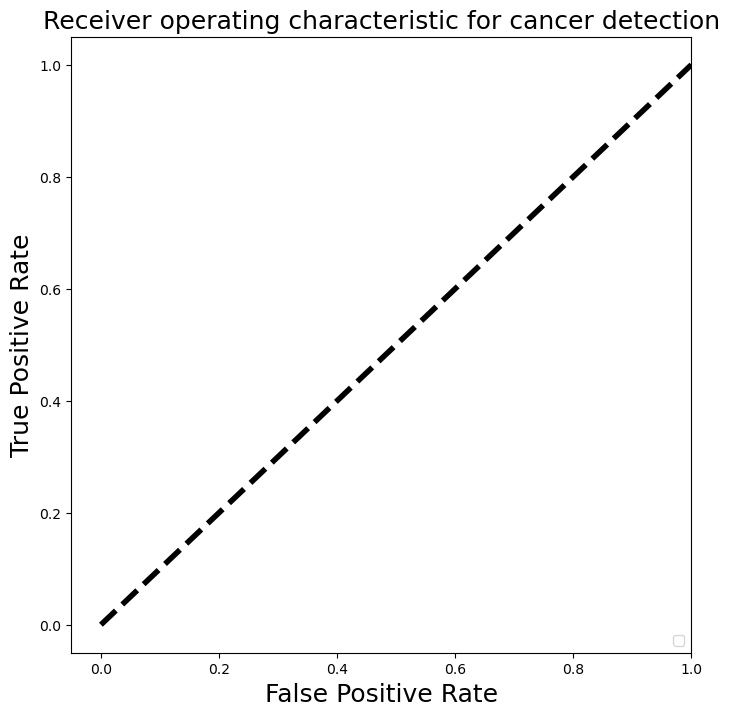

In [35]:
# For class 1, find the area under the curve
# Find fpr, tpr

# Find auc

# Plot of a ROC curve for class 1 (has_cancer)
plt.figure(figsize=[8,8])

# Plot fpr, tpr
plt.plot([0, 1], [0, 1], 'k--', linewidth=4)
plt.xlim([-0.05, 1.0])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate', fontsize=18)
plt.ylabel('True Positive Rate', fontsize=18)
plt.title('Receiver operating characteristic for cancer detection', fontsize=18)
plt.legend(loc="lower right")
plt.show()

In [36]:
predict_proba= model.predict_proba(X)

In [37]:
print(predict_proba)

[[2.16635598e-11 1.00000000e+00]
 [1.37245053e-07 9.99999863e-01]
 [6.67824585e-06 9.99993322e-01]
 ...
 [7.16544664e-02 9.28345534e-01]
 [2.30606208e-05 9.99976939e-01]
 [9.44818794e-01 5.51812056e-02]]


In [38]:
proba_df= pd.DataFrame(predict_proba)

In [39]:
proba_df.head()

,0,1
0,2.166356e-11,1.000000
1,1.372451e-07,1.000000
2,6.678246e-06,0.999993
3,8.525367e-01,0.147463
4,1.414664e-03,0.998585


In [41]:
pred_proba_df = pd.DataFrame(model.predict_proba(X_test))
threshold_list = [0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5,0.55,0.6,0.65,.7,.75,.8,.85,.9,.95,.99]
for i in threshold_list:
    print ('\n******** For i = {} ******'.format(i))
    y_test_pred = pred_proba_df.applymap(lambda x: 1 if x>i else 0)
    test_accuracy = metrics.accuracy_score(y_test.values.reshape(y_test.values.size,1),
                                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1))
    print('Our testing accuracy is {}'.format(test_accuracy))

    print(confusion_matrix(y_test.values.reshape(y_test.values.size,1),
                           y_test_pred.iloc[:,1].values.reshape(y_test_pred.iloc[:,1].values.size,1)))


******** For i = 0.05 ******
Our testing accuracy is 0.7017543859649122
[[37 34]
 [ 0 43]]

******** For i = 0.1 ******
Our testing accuracy is 0.868421052631579
[[56 15]
 [ 0 43]]

******** For i = 0.15 ******
Our testing accuracy is 0.9298245614035088
[[63  8]
 [ 0 43]]

******** For i = 0.2 ******
Our testing accuracy is 0.9385964912280702
[[64  7]
 [ 0 43]]

******** For i = 0.25 ******
Our testing accuracy is 0.9385964912280702
[[65  6]
 [ 1 42]]

******** For i = 0.3 ******
Our testing accuracy is 0.9473684210526315
[[67  4]
 [ 2 41]]

******** For i = 0.35 ******
Our testing accuracy is 0.9473684210526315
[[68  3]
 [ 3 40]]

******** For i = 0.4 ******
Our testing accuracy is 0.9473684210526315
[[68  3]
 [ 3 40]]

******** For i = 0.45 ******
Our testing accuracy is 0.956140350877193
[[69  2]
 [ 3 40]]

******** For i = 0.5 ******
Our testing accuracy is 0.956140350877193
[[70  1]
 [ 4 39]]

******** For i = 0.55 ******
Our testing accuracy is 0.9649122807017544
[[71  0]
 [ 4 3

In [42]:
actual_labels = y_predicted
predicted_labels = y_test

# Initialize counts
TP = FP = TN = FN = 0

# Calculate TP, FP, TN, FN
for actual, predicted in zip(actual_labels, predicted_labels):
    if actual == 1 and predicted == 1:
        TP += 1
    elif actual == 1 and predicted == 0:
        FN += 1
    elif actual == 0 and predicted == 1:
        FP += 1
    elif actual == 0 and predicted == 0:
        TN += 1

# Create a confusion matrix DataFrame
confusion_matrix = pd.DataFrame([[TP, FN], [FP, TN]], columns=['Predicted Positive', 'Predicted Negative'], index=['Actual Positive', 'Actual Negative'])

print(confusion_matrix)

                 Predicted Positive  Predicted Negative
Actual Positive                  39                   1
Actual Negative                   4                  70


In [43]:
accuracy= (TP + TN) / float(TP + TN + FP + FN)
print(accuracy)

0.956140350877193


**References**

[Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/downloads/breast-cancer-wisconsin-data.zip/2)

[Validation curves: plotting scores to evaluate models](https://scikit-learn.org/stable/modules/learning_curve.html#learning-curves)



---



---



> > > > > > > > > © 2024 Institute of Data


---



---



